Latest date in dataset: 2018-12-11 00:00:00


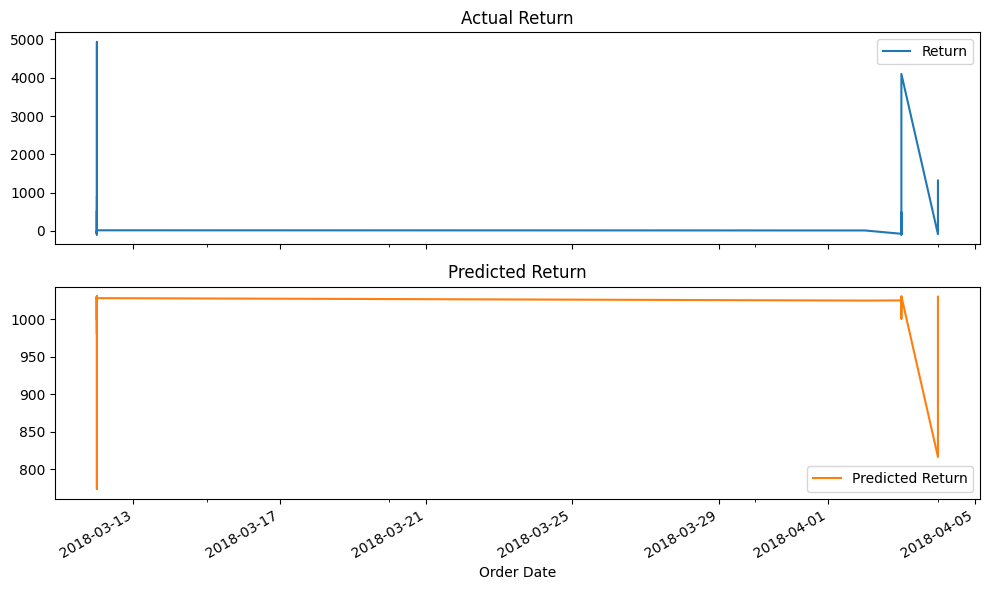

In [4]:
import numpy as np
import pandas as pd
from pathlib import Path
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

# Enable inline plots (for Jupyter or Colab)
%matplotlib inline

# Load your dataset
sales_df = pd.read_csv(
    Path("cleaned_sales_data.csv"), index_col="Order Date", parse_dates=True
)

# Calculate percentage returns for 'Sales'
sales_df['Return'] = sales_df['Sales'].pct_change() * 100

# Replace inf/-inf with NaN and drop all NaNs
returns = sales_df.replace([np.inf, -np.inf], np.nan).dropna()

# Create lagged return
returns['Lagged_Return'] = returns["Return"].shift()
returns = returns.dropna()

# Print latest date in data to verify
print("Latest date in dataset:", returns.index.max())

# Split into train/test using 80/20 index-based split
split_idx = int(len(returns) * 0.8)
train = returns.iloc[:split_idx]
test = returns.iloc[split_idx:]

# Create X and y sets
x_train = train[["Lagged_Return"]]
y_train = train["Return"]
x_test = test[["Lagged_Return"]]
y_test = test["Return"]

# Fit Linear Regression Model
model = LinearRegression()
model.fit(x_train, y_train)

# Make predictions
predictions = model.predict(x_test)

# Assemble results
results = y_test.to_frame()
results["Predicted Return"] = predictions

# Plot the first 20 predictions vs actual returns
results[:20].plot(subplots=True, figsize=(10, 6), title=["Actual Return", "Predicted Return"])
plt.tight_layout()
plt.show()
